In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Agenda

* Example: Diabetes dataset
    * LinearRegression
    * Evaluate the model with $R^2$ coefficient
    * Feature engineering
    * train_test_split
* Example: Hand-written digits dataset
    * $k$-nearest neighbours classifier
    * Evaluating the model 
    * Other classifiers
* Dataset show and tell
    * *i.e.*, for next time, find a dataset that we can work on (*e.g.*, Kaggle, UCI database, *etc.*)
    * See ["Looking for example datasets"](https://github.com/ubcs3/2016-Fall/issues/2) Issue on the UBCS3/2016-Fall Github page

## 1. Diabetes Dataset (continued)

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['target', 'data'])

In [4]:
X = diabetes.data;
y = diabetes.target;

In [3]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression();
reg.fit(X,y);

Now that our model is fit, let's evaluate it (*e.g.* by using the $R^2$ coefficient)

In [12]:
## R2 coefficient:
reg.score(X,y)

0.51774942541329338

In [13]:
reg.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [14]:
reg.intercept_

152.13348416289651

Let's see what `reg.fit` and `reg.score` do! 

The equation for a linear regression model is 
$$ 
A = (X^T X)^{-1} X^T y 
$$

In [26]:
## Recall that X is the array of the data. 
Xm = np.matrix(X); # turn into a matrix for multiplication reasons
ym = np.matrix(y).T;

A = (Xm.T * Xm)**(-1) * Xm.T * ym;
print(A);

[[ -10.01219782]
 [-239.81908937]
 [ 519.83978679]
 [ 324.39042769]
 [-792.18416163]
 [ 476.74583782]
 [ 101.04457032]
 [ 177.06417623]
 [ 751.27932109]
 [  67.62538639]]


$$
R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \overline{y})^2}
$$

In the formula above, $\overline{y}$ is the sample mean and $\hat{y}$ is the value predicted by the model.  

In [31]:
R2 = 1 - ( np.sum( (y - reg.predict(X))**2 ) / np.sum( (y-np.mean(y))**2 ) );
print(R2)

0.517749425413


That's not so great. We're saying that only $\sim 51\%$ of the variance is explained by the model.

### How can we improve the model? 

Introduce more features: 

In [32]:
Xnew = np.hstack((X, X**2)); 
Xnew.shape


(442, 20)

In [33]:
reg.fit(Xnew, y);

In [34]:
reg.score(Xnew,y)

0.54615964594306987

**Note:** We should have split the data into a training set and a testing set! 

In [39]:
num_samples = 300;
X_train = Xnew[:num_samples, :];
X_test = Xnew[num_samples:, :];
y_train = y[:num_samples];
y_test = y[num_samples:];


In [40]:
reg.fit(X_train, y_train);
reg.score(X_test, y_test)

0.48868400155663383

But the data could have been ordered. So instead, let's use a function that will split up the data for us. 

In [87]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=.2);

Okay, now we train and score as usual: 

In [88]:
reg.fit(X_train, y_train);
reg.score(X_test, y_test)

0.49009658175057569

## Hand-written digits dataset

In [89]:
from sklearn.datasets import load_digits
digits = load_digits();

In [90]:
digits.keys()

dict_keys(['target_names', 'data', 'DESCR', 'target', 'images'])

In [91]:
images = digits.images;

In [92]:
images.shape

(1797, 8, 8)

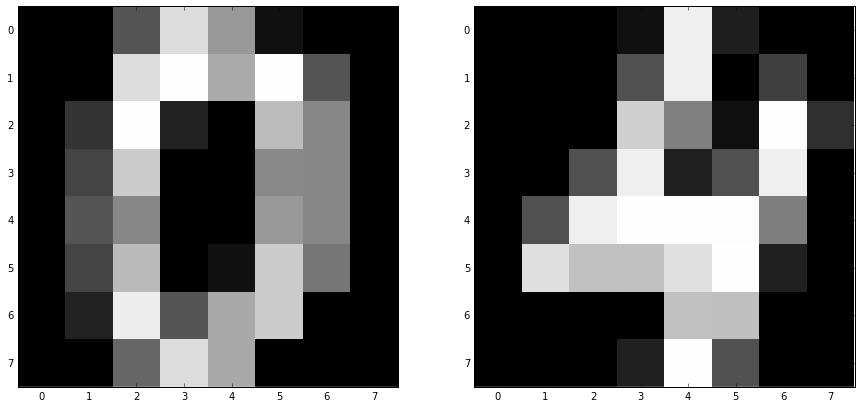

In [101]:
fig,ax = plt.subplots(1,2, figsize=(15,8));
ax[0].imshow(images[0, :, :], cmap="gray", interpolation='None');
ax[1].imshow(images[1001, :,:], cmap="gray", interpolation='None');

In [102]:
from sklearn.neighbors import KNeighborsClassifier as KNN;

In [110]:
clf = KNN(n_neighbors=10);
digits_train, digits_test, label_train, label_test = train_test_split(digits.data, digits.target, test_size=.3);
clf.fit(digits_train, label_train);
clf.score(digits_test, label_test)

0.98703703703703705

Let's see how it works. 

[4]


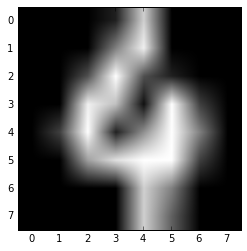

In [125]:
plt.imshow(images[100, :,:], cmap='gray');
print(clf.predict(digits.data[100,:].reshape(1,64)));

Except that one could have been in our training set. So let's try with the test set. 

[1]
9


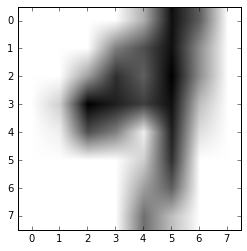

In [124]:
plt.imshow(digits_test[10, :].reshape(8,8), cmap='binary');
print(clf.predict(digits_test[10,:].reshape(1,64)));
print(label_test[10]);

Whoops. That didn't work out! But it's admittedly very illegible. Let's try another. 

[0]
0


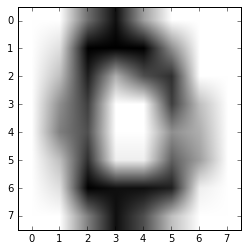

In [123]:
plt.imshow(digits_test[11, :].reshape(8,8), cmap='binary');
print(clf.predict(digits_test[11,:].reshape(1,64)));
print(label_test[11]);

Success! Okay, so we're getting at least some results that we'd hope for. 

## 3. Finding Good Data

* Goal: find an open data set that we can work on in the class. 
    * To this end, see the corresponding [Issue on Github](https://github.com/ubcs3/2016-Fall/issues/2) for a list compiled by the seminar participants.

Alternatively, check out these resources: 
* Bike sharing: 
    * [Bike sharing data from Porto, Portugal](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)
    * [Bike sharing data from the Bay Area, USA](http://www.bayareabikeshare.com/open-data)
* [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html)
    * use the left-hand menu to select from datasets for classification, regression, clustering, *etc.*
* [Public Datasets for Machine Learning](http://homepages.inf.ed.ac.uk/rbf/IAPR/researchers/MLPAGES/mldat.htm)
    * assorted databases including Nonlinear Dimensionality Reduction, ChemDB and links from Google
* [MIAS database](http://www.mammoimage.org/databases/)
    * Mammographic Image Analysis Society
